In [115]:
# -------------------------------------------------------
# Airbnb Dataset Analysis - Problem Statement 1
# Content Trends Analysis for Strategic Recommendations
# -------------------------------------------------------

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Setup visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# -------------------------------------------------------
# 2. Load Dataset
# -------------------------------------------------------
df = pd.read_csv("Airbnb_Open_Data.csv",low_memory=False)
# Quick look at dataset
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

df.info()

Shape of Dataset: (102599, 26)

Columns: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']

Missing Values:
 id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy     

In [116]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [117]:

# drop and rename
df.drop_duplicates(inplace=True)
df.drop(['house_rules', 'license'], axis= 1, inplace= True)

df['price']=df['price'].str.replace('$','',regex=False)
df['service fee']=df['service fee'].str.replace('$','',regex=False)


df['price']=df['price'].str.replace(',','',regex=False)
df['service fee']=df['service fee'].str.replace(',','',regex=False)

df.rename(columns={'price':'price_$', 'service fee':'service_fee_$'},inplace=True)

df.dropna(inplace=True)

df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)


df.loc[df['neighbourhood group'] == 'brookln' , 'neighbourhood group'] = 'Brooklyn'

df=df.drop(df[df['availability 365']>500].index)


# Data Analysis
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411,83411.000000,83411.000000,83411.000000,83411.000000
mean,40.727353,-73.948500,2012.488509,626.212730,125.243709,7.405366,32.276642,2019-06-08 22:01:01.027922176,1.377584,3.278776,7.032682,141.742612
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762595,-73.930815,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056324,0.050347,5.760870,331.787179,66.360979,28.102221,51.957777,NaN,1.751041,1.283599,29.551590,133.368399


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null  object        
 11  instan

In [119]:
df.duplicated().value_counts()

,count
False,83411


Property types:

                  count
room type             
Entire home/apt  44163
Private room     37494
Shared room       1646
Hotel room         108


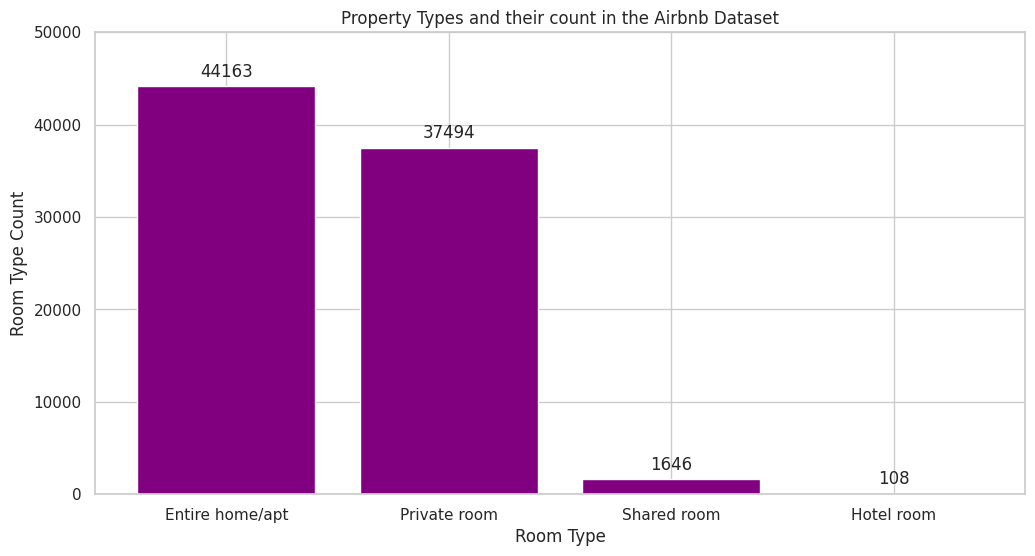

In [142]:

property_types = df['room type'].value_counts().to_frame()
print("Property types:\n\n",property_types)
room_type=plt.bar(property_types.index, property_types.loc[:,"count"], color="purple");
plt.bar_label(room_type,labels=property_types.loc[:,"count"], padding=4);
plt.ylim([0,50000]);
plt.xlabel("Room Type");
plt.ylabel("Room Type Count");
plt.title("Property Types and their count in the Airbnb Dataset");


Neighbiurhood Group:

                      count
neighbourhood group       
Brooklyn             34636
Manhattan            34566
Queens               11126
Bronx                 2267
Staten Island          816


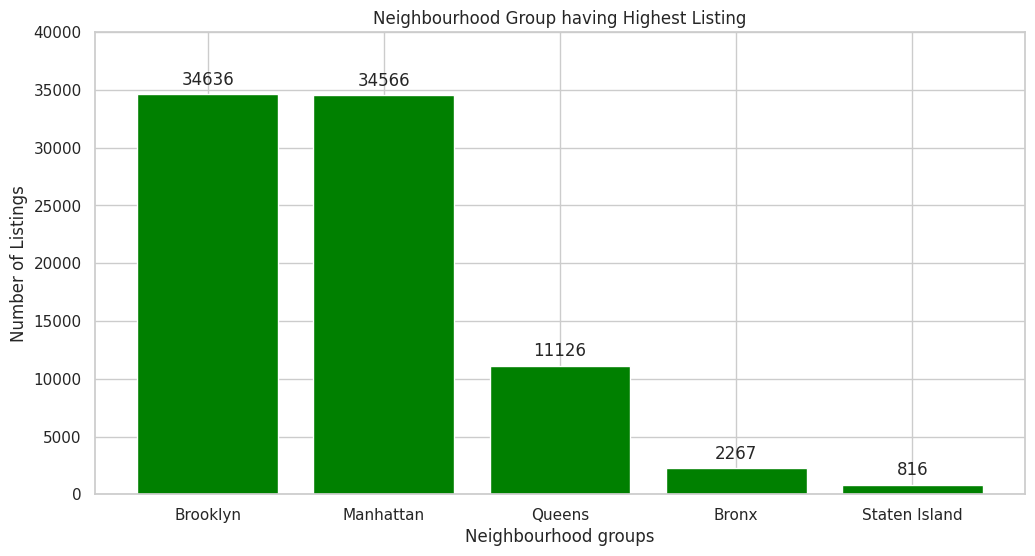

In [141]:

neighbour = df['neighbourhood group'].value_counts().to_frame()
print("Neighbiurhood Group:\n\n",neighbour)
group_bar=plt.bar(neighbour.index, neighbour.loc[:,"count"], color="green");
plt.bar_label(group_bar,labels=neighbour.loc[:,"count"], padding=4);
plt.ylim([0,40000]);
plt.xlabel("Neighbourhood groups");
plt.ylabel("Number of Listings");
plt.title("Neighbourhood Group having Highest Listing");


Average prices of the Neighbourhood Groups:

                         price_$
neighbourhood group            
Queens               630.457127
Bronx                630.201147
Brooklyn             627.436684
Manhattan            623.454869
Staten Island        622.132353


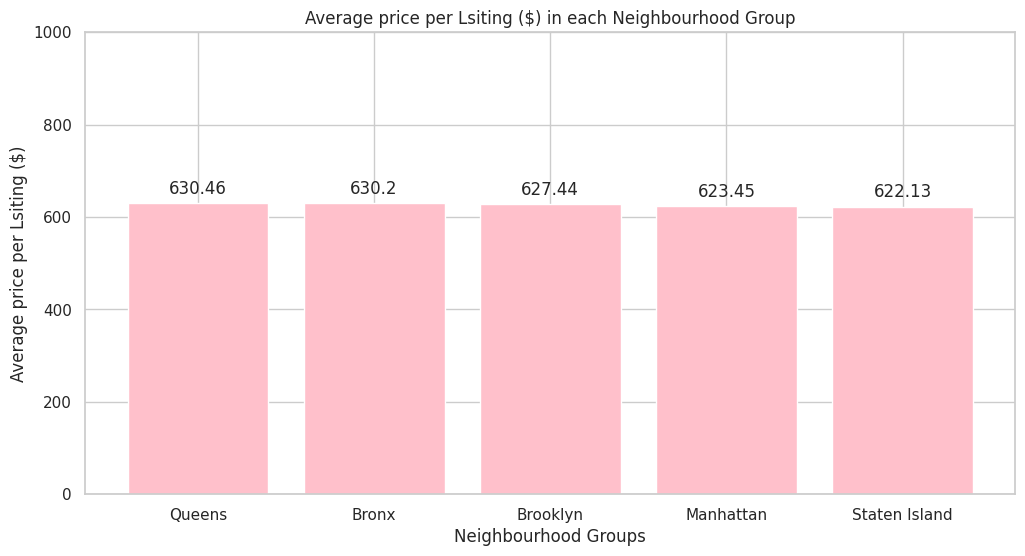

In [145]:

avg = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
print("Average prices of the Neighbourhood Groups:\n\n",avg)
avg_bar=plt.bar(avg.index, avg.loc[:,"price_$"], color="pink");
plt.bar_label(avg_bar,labels=round(avg.loc[:,"price_$"],2), label_type='edge', padding=4);
plt.ylim([0,1000]);
plt.xlabel("Neighbourhood Groups");
plt.ylabel("Average price per Lsiting ($)");
plt.title("Average price per Lsiting ($) in each Neighbourhood Group");


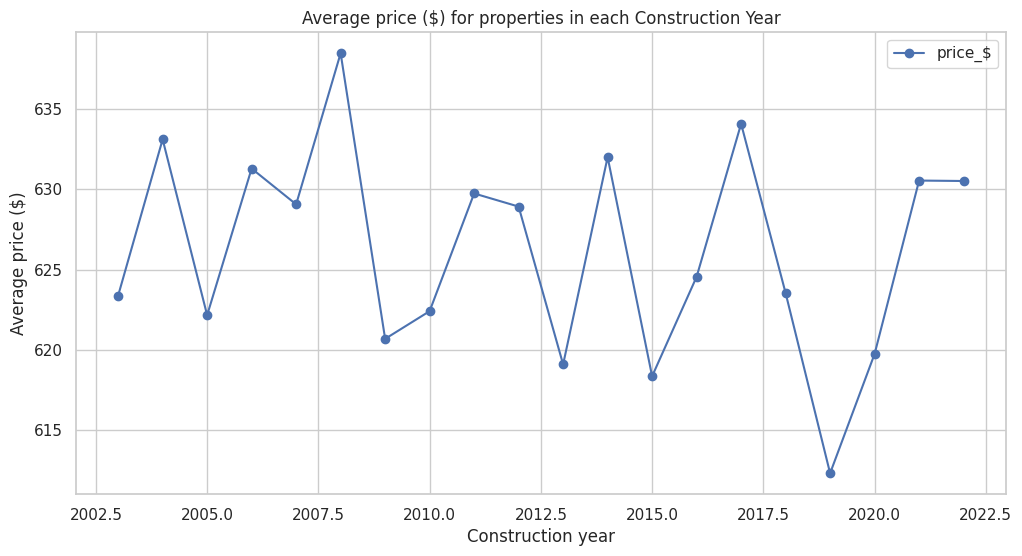

In [125]:
avg = df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot(marker ="o");
plt.xlabel("Construction year");
plt.ylabel("Average price ($)");
plt.title("Average price ($) for properties in each Construction Year");

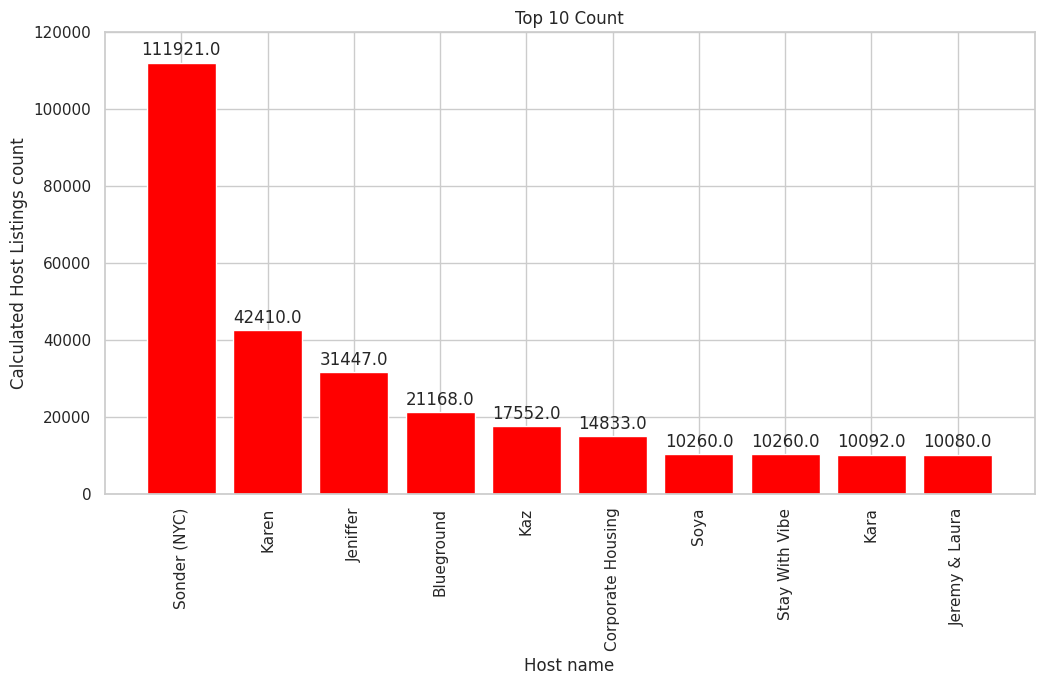

In [131]:

hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
host_bar=plt.bar(hosts.index, hosts.loc[:,"calculated host listings count"], color="red");
plt.bar_label(host_bar,labels=hosts.loc[:,"calculated host listings count"], label_type='edge', padding=3);
plt.ylim([0,120000]);
plt.xlabel("Host name");
plt.xticks(rotation=90)
plt.ylabel("Calculated Host Listings count");
plt.title("Top 10 Count");


Review                         review rate number
host_identity_verified                    
verified                          3.284186
unconfirmed                       3.273370


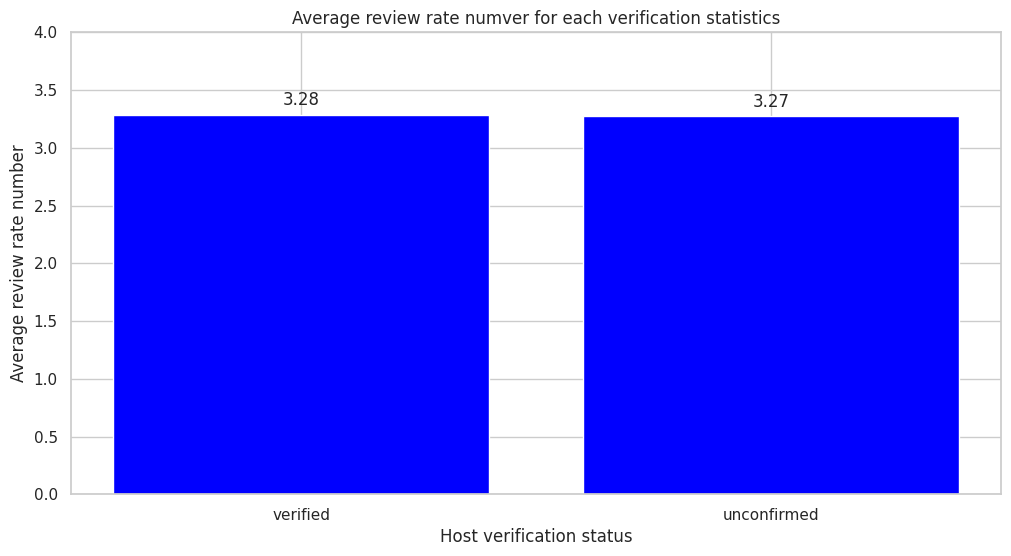

In [132]:

review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
print("Review",review)
review_bar=plt.bar(review.index, review.loc[:,"review rate number"], color="blue");
plt.bar_label(review_bar,labels=round(review.loc[:,"review rate number"],2), label_type='edge', padding=4);
plt.ylim([0,4]);
plt.xlabel("Host verification status");
plt.ylabel("Average review rate number");
plt.title("Average review rate numver for each verification statistics");

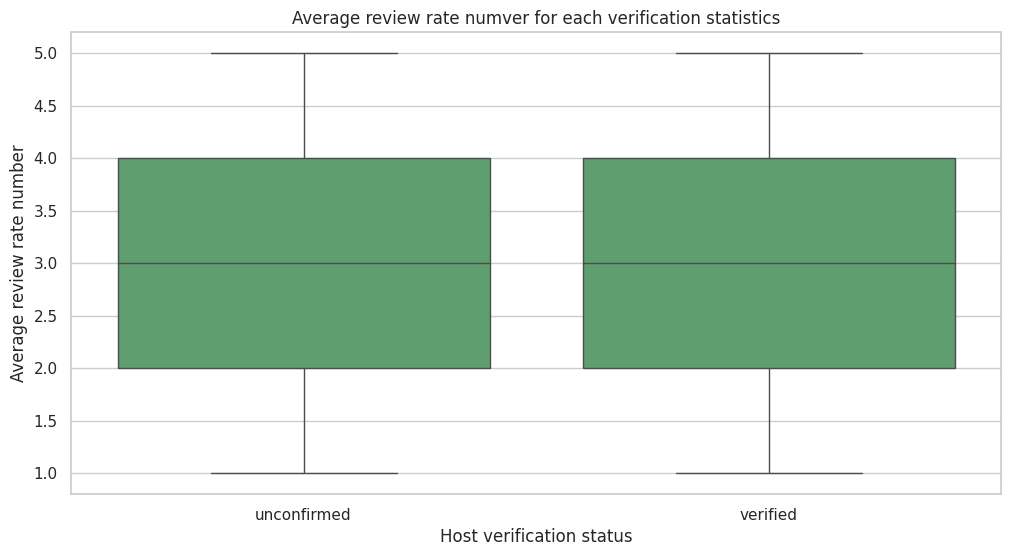

In [133]:
base_color=sns.color_palette()[2]
sns.boxplot(data=df,x="host_identity_verified",y="review rate number", color=base_color);
plt.xlabel("Host verification status");
plt.ylabel("Average review rate number");
plt.title("Average review rate numver for each verification statistics");

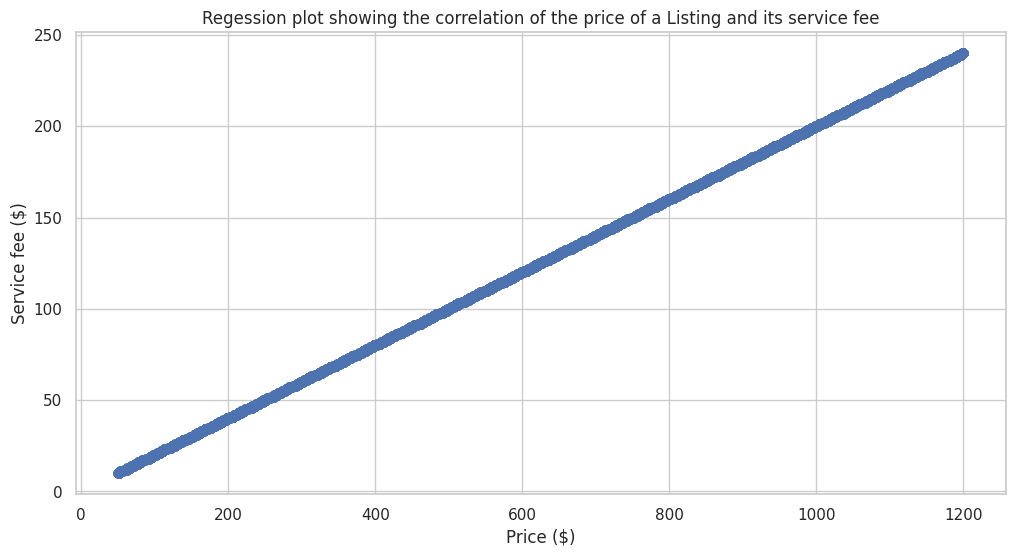

In [134]:
df['price_$'].corr(df['service_fee_$'])
sns.regplot(df,x='price_$',y='service_fee_$');
plt.xlabel("Price ($)");
plt.ylabel("Service fee ($)");
plt.title("Regession plot showing the correlation of the price of a Listing and its service fee");

                                     review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3

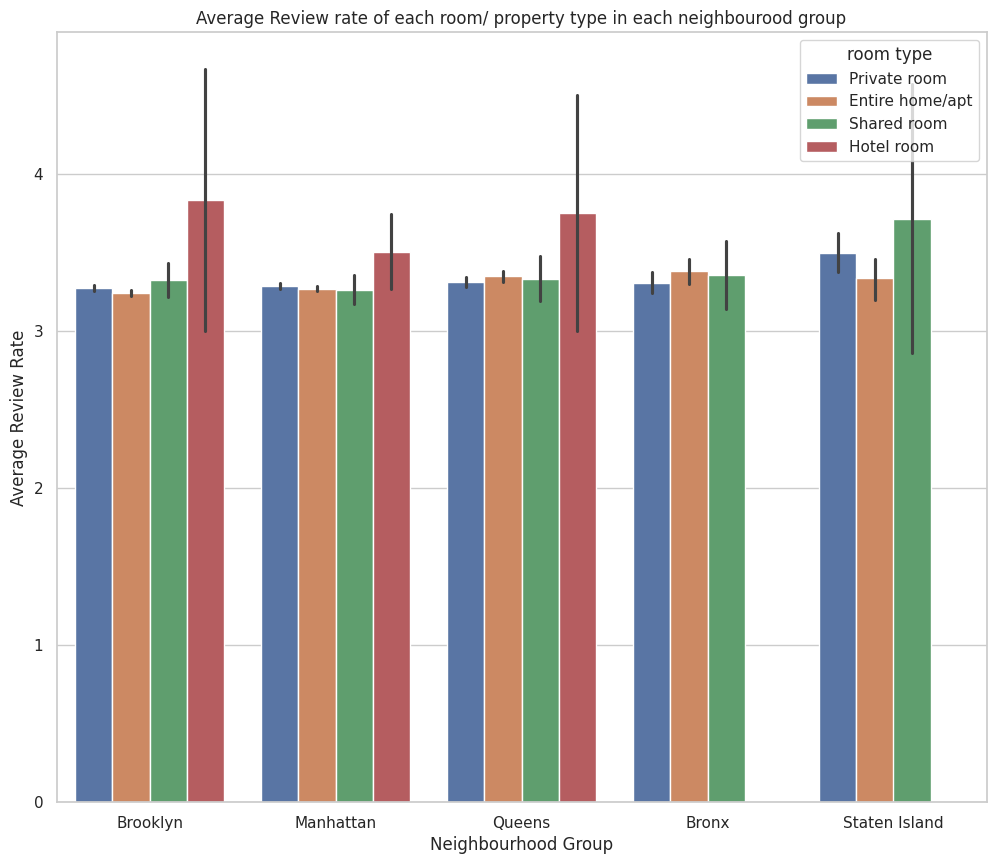

In [135]:
ar=df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
print(ar)
plt.figure(figsize=[12,10]);
sns.barplot(data=df,x='neighbourhood group',y='review rate number', hue= 'room type');
plt.xlabel("Neighbourhood Group");
plt.ylabel("Average Review Rate");
plt.title("Average Review rate of each room/ property type in each neighbourood group");

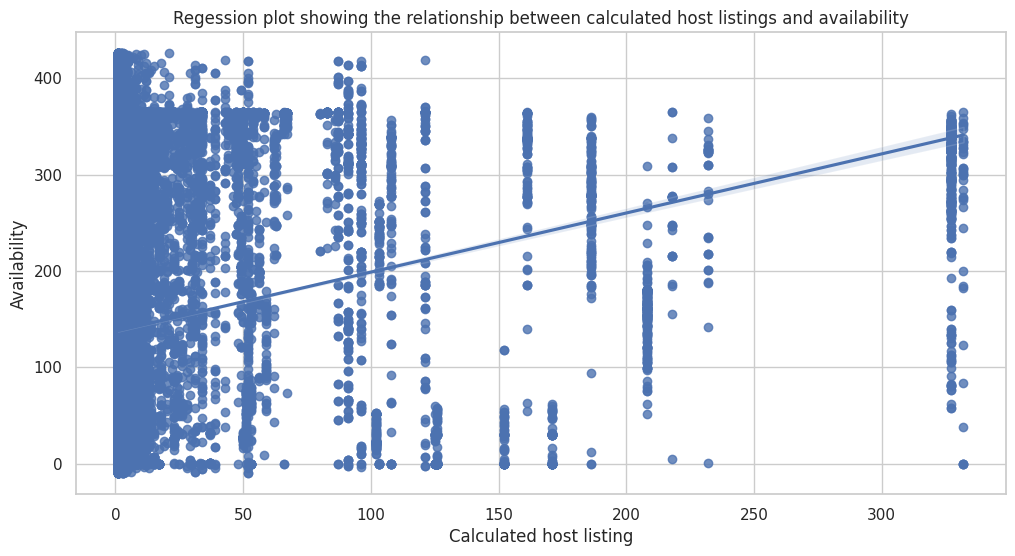

In [136]:

sns.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel("Calculated host listing");
plt.ylabel("Availability");
plt.title("Regession plot showing the relationship between calculated host listings and availability");

In [138]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1359855273675869)